## Evaluating a machine learning model..

Three ways to evaluate  Scikit-Learn models:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric function 

### Evaluating model with scoring method

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv("heart-disease.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [142]:
#spliting the data

X = df.drop(["target"],axis = 1)
y = df["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 3)

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
#check the score for training data
clf.score(X_train,y_train)

1.0

In [89]:
#test data
clf.score(X_test,y_test)

0.8157894736842105

#### Lets do the same for regression model

In [90]:
from sklearn.datasets import load_boston

boston = load_boston()

In [91]:
boston_df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [92]:
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop(["target"],axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
#score for traing set
reg.score(X_train,y_train)

0.9817470957716632

In [94]:
#score for test set
reg.score(X_test,y_test)

0.8268263361990221

# Evaluating model using  scoring parameter/cross validation 

* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

* The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

* Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

* It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

* The general procedure is as follows:

1.Shuffle the dataset randomly.
2.Split the dataset into k groups
3.For each unique group:
Take the group as a hold out or test data set
Take the remaining groups as a training data set
4.Fit a model on the training set and evaluate it on the test set
5.Retain the evaluation score and discard the model

* Summarize the skill of the model using the sample of model evaluation scores
Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(3)

X = df.drop(["target"],axis = 1)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
model.score(X_test,y_test)

0.8131868131868132

In [97]:
#cross_val_score

cross_val_score(model,X,y)

array([0.81967213, 0.90163934, 0.80327869, 0.85      , 0.78333333])

In [98]:
cross_val_score(model,X,y,cv = 10)

array([0.87096774, 0.80645161, 0.83870968, 0.86666667, 0.86666667,
       0.8       , 0.63333333, 0.83333333, 0.73333333, 0.76666667])

In [99]:
np.random.seed(3)

#single training and test split score
model_single_score = model.score(X_test,y_test)

#take mean of 5 fold cross validation
model_cross_score = np.mean(cross_val_score(model,X,y,cv = 5))

#compare the two
model_single_score,model_cross_score

(0.8131868131868132, 0.8182513661202186)

## Classification model evaluation metrics

1. Accuracy
2. Area Under ROC Curve
3. Confusion matrix
4. Classification report



### Accuracy

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.drop(["target"],axis = 1)
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#cross val score
cross_val_score = cross_val_score(clf,X,y,cv= 5)

In [101]:
print(f"Heart disease classifier Cross val Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart disease classifier Cross val Accuracy:83.15%


**Area Under the receiver Operating characteristic Curve(AUC/ROC)**

* Area Under Curve(AUC)
* ROC Curve

ROC Curves are a comparison of a model's true positive rate(tpr) veruus false positive rate(fpr)

* True positive     = model predicts 1 when truth is 1
* False positive    = model predicts 1 when truth is 0
* True negative     = model predicts 0 when truth is 0
* False negative    = model predicts 0 when truth is 1

In [102]:
from sklearn.metrics import roc_curve

#make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[0.18, 0.82],
        [0.52, 0.48],
        [0.32, 0.68],
        [0.15, 0.85],
        [0.71, 0.29],
        [0.93, 0.07],
        [0.24, 0.76],
        [0.31, 0.69],
        [0.86, 0.14],
        [0.55, 0.45]]),
 76)

In [103]:
#from probability metrix lets check only positive probabilities
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.82, 0.48, 0.68, 0.85, 0.29, 0.07, 0.76, 0.69, 0.14, 0.45])

In [104]:
#claculate fpr,tpr,threshold
fpr,tpr,threshold = roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02777778, 0.02777778, 0.02777778, 0.02777778,
       0.05555556, 0.05555556, 0.05555556, 0.08333333, 0.08333333,
       0.11111111, 0.11111111, 0.13888889, 0.13888889, 0.16666667,
       0.22222222, 0.22222222, 0.30555556, 0.30555556, 0.33333333,
       0.44444444, 0.47222222, 0.52777778, 0.61111111, 0.69444444,
       0.75      , 0.83333333, 0.86111111, 0.94444444, 1.        ])

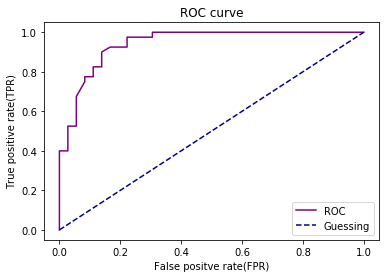

In [105]:
#creating a function for plotting a roc curve

def plot_roc(fpr,tpr):
    
    plt.plot(fpr,tpr,color = "purple",label = "ROC")
    #plot a line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color = "darkblue",linestyle = "--",label = "Guessing")
    
    #customize the plot
    plt.xlabel("False positve rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
    
plot_roc(fpr,tpr)

In [106]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9423611111111112

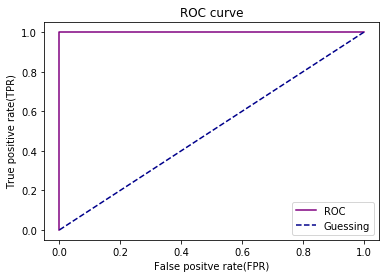

In [107]:
#plot the perfect roc curve
fpr,tpr,threshold = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

In [108]:
roc_auc_score(y_test,y_test)

1.0

# Confusion matrix
### Confusion matrix is a quick way to compare labels a model predicts and the actual label it was supposed to predict

In [109]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[31,  5],
       [ 4, 36]], dtype=int64)

In [110]:
#visualize the model with pd crosstab

pd.crosstab(y_test,y_pred,rownames = ["Actual label"],colnames = ["Pridicted label"])

Pridicted label,0,1
Actual label,,
0,31,5
1,4,36


Text(6.0, 0.5, 'Predicted Label')

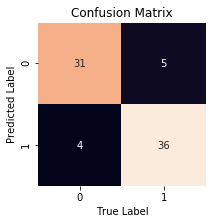

In [111]:
#plot the confusion matrix with seaborn 
import seaborn as sns

fig,ax = plt.subplots(figsize= (3,3))
ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                     annot = True,
                     cbar= False)

plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

## **Classification Report**

* Precision - Indicates the proportion of positive identification which were actually correct.A model which produce no False Positive has a precision of 1  
    
    Precision = TP/(TP + FP) 


* Recall - Indicates the proportion of actual positivewhich were correctly classified. A model which produce no False Negetive has a Recall of 1

    Recall = TP/(TP + FN) 

* F1-score - A combination of Recall and Precision.A perfect model achives an F1 score of 1

* Support  - The number of sample each metric was calculated on.

* Specificity -The specificity returns the proportion of negative values correctly predicted.
    
   Specificity: TN/ (TN + FP)

* Macro avg - The arithmetic average of a metric between the two classes.
    
    Macro average(precision) = (p0 + p1)/2
    
* Weighted average: the weighted average is calculated by dividing sum(metric of interest x weight) by sum(weights).
  Here the weights are the number of observation for each class.
  
     Weighted average (precision)= (p0 x s0 + p1 x s1)/(s0 + s1)

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.88      0.90      0.89        40

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



## Regression model evaluation metrics
 1. R-squared or coefficient of determination
 2. Adjusted R-square
 3. Mean Absolute Error (MAE)
 4. Mean Square Error (MSE)
 5. Root Mean Square Error(RMSE)
 6. Mean Absolute Percentage Error (MAPE)

## R-square
* R square represent the proportion of variance of the dependant variable that has been explained by the independant variables.

  R^2 = 1 - (RSS/TSS)
  
  RSS - Residuals sum of square
  TSS - Total sum of square

In [113]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(2)

X = boston_df.drop(["target"],axis = 1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [114]:
model.score(X_test,y_test)

0.8820474097663575

In [115]:
y_pred = model.predict(X_test)

r2_score(y_test,y_pred)

0.8820474097663576

In [116]:
from sklearn.metrics import r2_score

#fill an array with y_test_mean

y_test_mean = np.full(len(y_test),y_test.mean())

In [117]:
y_test.mean(),len(y_test)

(22.930708661417317, 127)

In [118]:
y_test_mean

array([22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93070866,
       22.93070866, 22.93070866, 22.93070866, 22.93070866, 22.93

In [119]:
r2_score(y_test,y_test_mean)

0.0

In [120]:
r2_score(y_test,y_test)

1.0

## Mean Absolute Error(MAE)

* MAE is obtained by calculating the absolute difference between the model prediction and the true value..

  MAE = 1/n * (sum(|yi - y^|).
  
  
*  The lower the value, better the model performance is..


In [121]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)

mae

2.198582677165354

In [122]:
df = pd.DataFrame(data = {"Actual_value":y_test,
                          "Predicted_Value":y_pred})

df.head(6)

,Actual_value,Predicted_Value
463,20.2,21.382
152,15.3,20.706
291,37.3,32.516
183,32.5,30.299
384,8.8,8.520
141,14.4,14.073


## Mean Square Error(MAE)

* MSE is using absolute values squares of the difference between model prediction and the training dataset.In case of data outliers,MSE willbecome musch larger compared to MAE.Since the error is being squared any predicting error is being heavily penalized..
   
    MSE = 1/n *(sum(yi - y^)2)

In [123]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

In [124]:
mse

10.468459779527555

In [125]:
ds = pd.DataFrame(data = {"Actual_value":y_test,
                          "Predicted_value":y_pred})

ds["difference"] = ds["Predicted_value"] - ds["Actual_value"]

ds.head(5)

,Actual_value,Predicted_value,difference
463,20.2,21.382,1.182
152,15.3,20.706,5.406
291,37.3,32.516,-4.784
183,32.5,30.299,-2.201
384,8.8,8.520,-0.280


In [126]:
t_diff = np.square(ds["difference"])
t_diff.mean()

10.468459779527555

## Root Mean Square Error(RMSE)

* It represent the standard deviation of the residuals.RMSE provides the estimate of how large the residuals are being disparsed

In [127]:
rmse = np.sqrt(mse)
rmse

3.235499927295248

In [128]:
## Cross Val Socre for regression model

model = RandomForestRegressor(n_estimators = 100)

In [129]:
from sklearn.model_selection import cross_val_score

cross_val_reg = cross_val_score(model,X,y,cv = 10,scoring = None)

In [130]:
cross_val_reg

array([ 0.71141798,  0.79376124,  0.28177385,  0.76818796,  0.84127024,
        0.73995165,  0.55692096,  0.37170399, -0.19245022,  0.25111469])

In [131]:
#cross val score for accuracy
print(f"cross validated accuracy :{np.mean(cross_val_reg)*100:.2f}%")

cross validated accuracy :51.24%


In [132]:
#r2 
cv_r2 = cross_val_score(model,X,y,cv = 10,scoring = "r2")
print(f"cross validated r2_score : {np.mean(cv_r2)*100:.2f}%")

cross validated r2_score : 48.43%


In [133]:
#mae
cv_mae = cross_val_score(model,X,y,cv = 10,scoring = "neg_mean_absolute_error")
cv_mae

array([-2.75943137, -1.49305882, -1.77752941, -3.68668627, -2.77205882,
       -2.98735294, -2.21966   , -6.23892   , -3.57674   , -2.7618    ])

# Using different evaluation metrics as Scikit Learn function

**Classification evaluation Function**

In [143]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on test data")
print(f"accuarcy score :{accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"precision_score :{precision_score(y_test,y_pred)}")
print(f"recall_score :{recall_score(y_test,y_pred)}")
print(f"F1_score : {f1_score(y_test,y_pred)}")

Classifier metrics on test data
accuarcy score :81.58%
precision_score :0.8367346938775511
recall_score :0.8723404255319149
F1_score : 0.8541666666666667
